In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#Sport model entrainement

In [0]:
df  = pd.read_csv('drive/My Drive/PFA/sport.csv')

In [0]:
df.head()

,title,text,label
0,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,fake
1,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,fake
2,Tone Deaf Trump: Congrats Rep. Scalise On Los...,Donald Trump just signed the GOP tax scam into...,fake
3,SNL Hilariously Mocks Accused Child Molester ...,"Right now, the whole world is looking at the s...",fake
4,CNN CALLS IT: A Democrat Will Represent Alaba...,Alabama is a notoriously deep red state. It s ...,fake


In [0]:
df['bool'] = np.where(df['label'] == "fake", 0, 1)
df.head(10)

,title,text,label,bool
0,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,fake,0
1,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,fake,0
2,Tone Deaf Trump: Congrats Rep. Scalise On Los...,Donald Trump just signed the GOP tax scam into...,fake,0
3,SNL Hilariously Mocks Accused Child Molester ...,"Right now, the whole world is looking at the s...",fake,0
4,CNN CALLS IT: A Democrat Will Represent Alaba...,Alabama is a notoriously deep red state. It s ...,fake,0
5,Donald Trump’s Eating Habits Could Be Dramati...,We ve all heard the stories of Donald Trump pr...,fake,0
6,‘Ghost Of Witness Flipped’: Hilarious SNL Ski...,"By now, everyone knows that disgraced National...",fake,0
7,Watch This Awesome Mashup of Michael Flynn Le...,Donald Trump s disgraced National Security Adv...,fake,0
8,Trump Wakes Up To Scream At Black People Afte...,Donald Trump thinks if he rage-tweets about NF...,fake,0
9,Former Obama Photographer Takes Trolling Trum...,By now you would most likely be familiar with ...,fake,0


In [0]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['bool'],random_state=0,test_size=0.20)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)


In [0]:
len(vect.get_feature_names())

38389

In [0]:

# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<6114x38389 sparse matrix of type '<class 'numpy.int64'>'
	with 765682 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9842698971116738


In [0]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['via' 'com' 'even' 'this' 'you' 'watch' 'because' 'obama' 'america'
 'most']

Largest Coefs: 
['reuters' 'washington' 'said' 'on' 'wednesday' 'told' 'republican'
 'thursday' 'donald' 'friday']


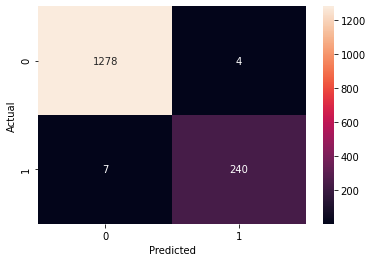

In [0]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt="d")
plt.show()

In [0]:
test_f = y_test.copy()
pred_f = predictions.copy()

len(test_f)

1529

#Business Model entrainement

In [0]:
df  = pd.read_csv('drive/My Drive/PFA/business.csv')
df['bool'] = np.where(df['label'] == "fake", 0, 1)
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['bool'],random_state=0,test_size=0.20)
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC:  0.9902166255268156


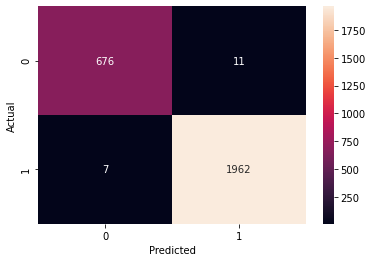

In [0]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt="d")
plt.show()

In [0]:

test_f = test_f.append(y_test)
pred_f = np.append(pred_f,predictions)

 # Entertainment Model entrainement

In [0]:
df  = pd.read_csv('drive/My Drive/PFA/entertainment.csv')
df['bool'] = np.where(df['label'] == "fake", 0, 1)
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['bool'],random_state=0,test_size=0.20)
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC:  0.9875114784205693


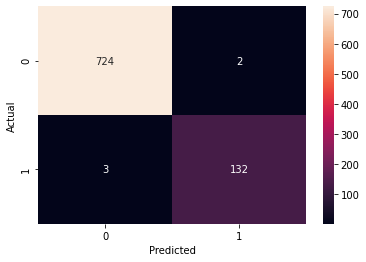

In [0]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt="d")
plt.show()

In [0]:

test_f = test_f.append(y_test)
pred_f = np.append(pred_f,predictions)

#Politics Model entrainement

In [0]:
df  = pd.read_csv('drive/My Drive/PFA/politics.csv')
df['bool'] = np.where(df['label'] == "fake", 0, 1)
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['bool'],random_state=0,test_size=0.20)
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC:  0.9954281776426088


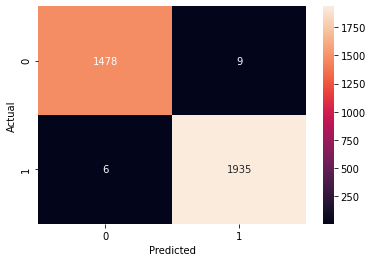

In [0]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt="d")
plt.show()

In [0]:

test_f = test_f.append(y_test)
pred_f = np.append(pred_f,predictions)

#Tech Model entrainement

In [0]:
df  = pd.read_csv('drive/My Drive/PFA/tech.csv')
df['bool'] = np.where(df['label'] == "fake", 0, 1)
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['bool'],random_state=0,test_size=0.20)
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC:  0.9708607462380768


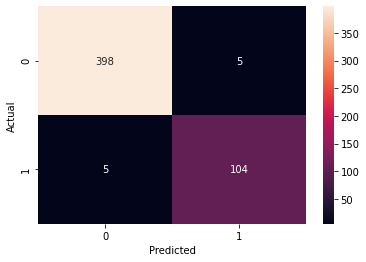

In [0]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt="d")
plt.show()

In [0]:

test_f = test_f.append(y_test)
pred_f = np.append(pred_f,predictions)

#Stats sur l'integralité

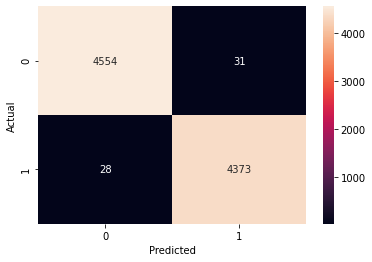

In [0]:
confusion_matrix = pd.crosstab(test_f, pred_f, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt="d")
plt.show()

In [0]:
print('AUC: ', roc_auc_score(test_f, pred_f))

AUC:  0.9934383159175929
